In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv("user_behavior_dataset.csv")  #import dataset

In [3]:
df.drop(["User_ID", "User_Behavior_Class"], axis=1, inplace=True)

In [4]:
df["usage_score"] = (              #define a new column which will be used to classify users
    df["App_Usage_Time"] +
    df["Screen_On_Time"] * 60 +
    df["Data_Usage"]
)

median_score = df["usage_score"].median()  #get column mean
df["User_Type"] = df["usage_score"].apply(lambda x: "Heavy" if x >= median_score else "Light")  #if current user's score is higher than mean, write 'heavy'. 'light' otherwise.
df.drop("usage_score", axis=1, inplace=True)

In [13]:
categorical_cols = ["Device_Model", "Operating_System", "Gender", "User_Type"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])    #encode categorical columns into numerical values

In [6]:
features = ["App_Usage_Time", "Screen_On_Time", "Data_Usage"]
X = df.drop(["User_Type"] + features, axis=1)    #put columns that model will use to predict user class
y = df["User_Type"]     #label of data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #split data into 80% training and 20% testing

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   #scale data so that mean = 0 and standard deviation = 1
X_test = scaler.transform(X_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)   #perform KNN with k = 5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test)   #get predicted labels for test data
print("Accuracy:", accuracy_score(y_test, y_pred))   #compare with true labels
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        68
           1       0.85      0.88      0.86        72

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140


Confusion Matrix:
 [[57 11]
 [ 9 63]]


ROC AUC Score: 0.9595588235294119


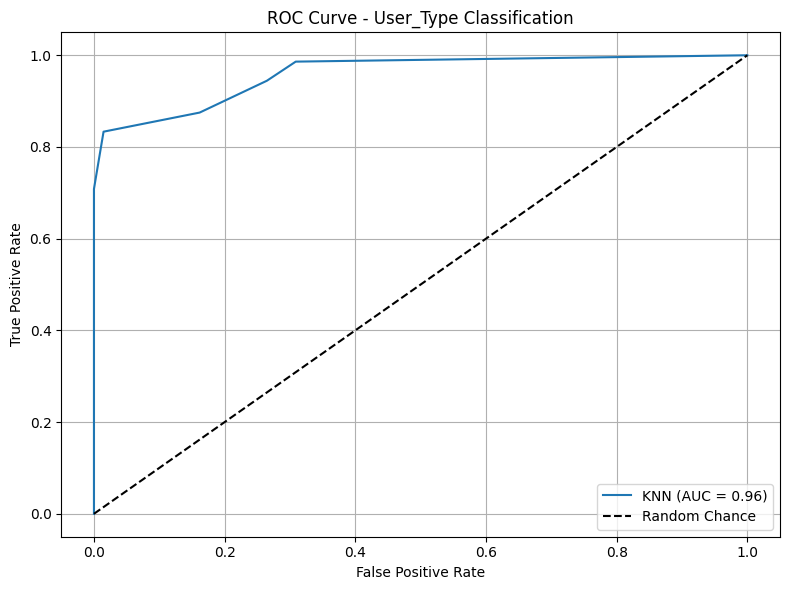

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = knn.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

fpr, tpr, _ = roc_curve(y_test, y_proba)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - User_Type Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score
#calculate AUC score for 5 folds of data
scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())   #get mean of scores

Cross-validated AUC scores: [0.96764646 0.98908163 0.97704082 0.9605102  0.98030612]
Mean AUC: 0.9749170467942229
